In [2]:
# importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score, KFold

import warnings
warnings.filterwarnings("ignore")

In [3]:
# getting the data.
df= pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
# getting the basic information about the columns and their data-type.
df.info()

# There are a lot of columns with all null entries. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [5]:
# deleteing columns with null values.
df.drop(columns=['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                861 non-null    float64
 6   longitude               861 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             198 non-null    object 
 9   commissioning_year      527 non-null    float64
 10  owner                   342 non-null    object 
 11  source                  907 non-null    object 
 12  url                     907 non-null    object 
 13  geolocation_source      888 non-null    object 
 14  year_of_capacity_data   519 non-null    fl

In [7]:
df['country'].value_counts()          # all entries in 'country' column have the same value of 'IND'

IND    907
Name: country, dtype: int64

In [8]:
df['country_long'].value_counts()     # all entries in 'country_long' column have the same value of 'India'

India    907
Name: country_long, dtype: int64

In [9]:
len(df['name'].unique())              # column contains name or title of the power plant.

907

In [10]:
len(df['gppd_idnr'].unique())         # column contains 10 or 12 character identifier for the power plant.

907

In [11]:
df['generation_data_source'].unique()           # mentions the agency that gave generation information

array([nan, 'Central Electricity Authority'], dtype=object)

In [12]:
df['geolocation_source'].unique()               # attribution for geolocation information

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [13]:
# dropping the above mentioned columns.
df.drop(columns=['country','country_long','name','gppd_idnr','owner','source','url','generation_data_source','geolocation_source'],inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            907 non-null    float64
 1   latitude               861 non-null    float64
 2   longitude              861 non-null    float64
 3   primary_fuel           907 non-null    object 
 4   other_fuel1            198 non-null    object 
 5   commissioning_year     527 non-null    float64
 6   year_of_capacity_data  519 non-null    float64
 7   generation_gwh_2014    398 non-null    float64
 8   generation_gwh_2015    422 non-null    float64
 9   generation_gwh_2016    434 non-null    float64
 10  generation_gwh_2017    440 non-null    float64
 11  generation_gwh_2018    448 non-null    float64
dtypes: float64(10), object(2)
memory usage: 85.2+ KB


In [15]:
df['primary_fuel'].unique()                  # Different types of primary fuel used in production.

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [16]:
df['other_fuel1'].unique()                   # Different types of secondary fuel used in production.

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [17]:
df['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [18]:
# Considering the null values in 'other_fuel1' column to be a separate category.
# Considering that there is no secondary fuel used in these power-plants and hence the 'None' value is given. 
df['other_fuel1']= df['other_fuel1'].replace(np.nan,"None")       

In [19]:
df['year_of_capacity_data'].unique()         # year the capacity information was reported. Only value present is '2019' and null.

array([  nan, 2019.])

In [20]:
df.drop(columns=['year_of_capacity_data'],inplace=True)        # dropping the 'year_of_capacity_data' column.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          907 non-null    object 
 5   commissioning_year   527 non-null    float64
 6   generation_gwh_2014  398 non-null    float64
 7   generation_gwh_2015  422 non-null    float64
 8   generation_gwh_2016  434 non-null    float64
 9   generation_gwh_2017  440 non-null    float64
 10  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(2)
memory usage: 78.1+ KB


In [22]:
# checking for duplicate entries.
df.duplicated().value_counts()
# There is one duplicate entry.

False    906
True       1
dtype: int64

In [23]:
# dropping the duplicate entry.
df.drop_duplicates(inplace=True,ignore_index=True)

In [24]:
# Let's see some visualization plots before we impute the columns having missing values.

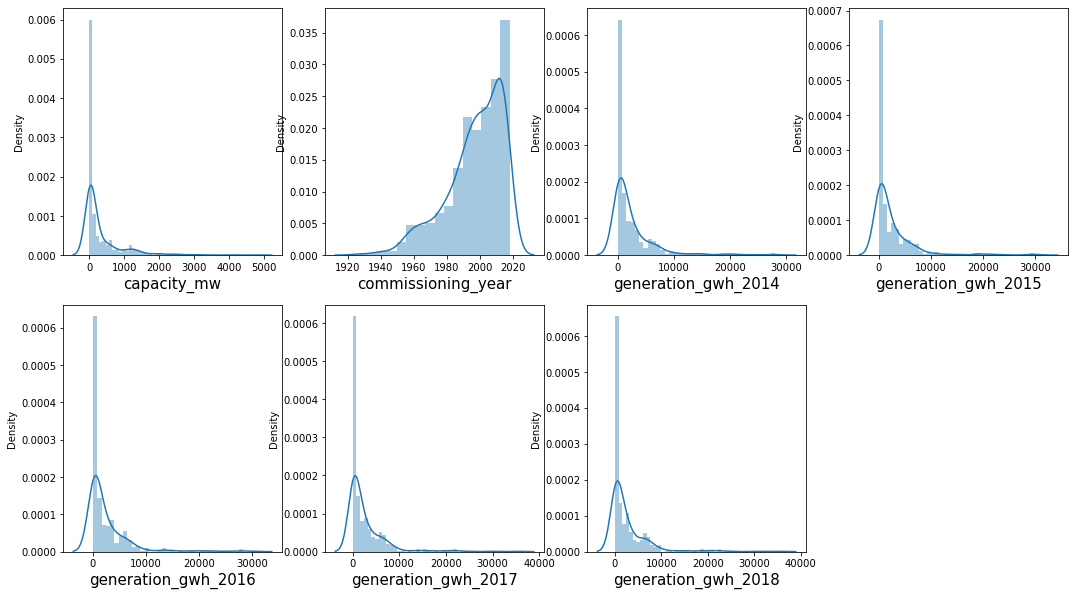

In [25]:
# let's see the distribution plot of the continuous-data columns that we have.

features_cont= df[['capacity_mw','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
                  'generation_gwh_2017','generation_gwh_2018']]
plt.figure(figsize=(18,10))
plotnumber=1
for column in features_cont:
    if plotnumber<=8:
        ax= plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show() 

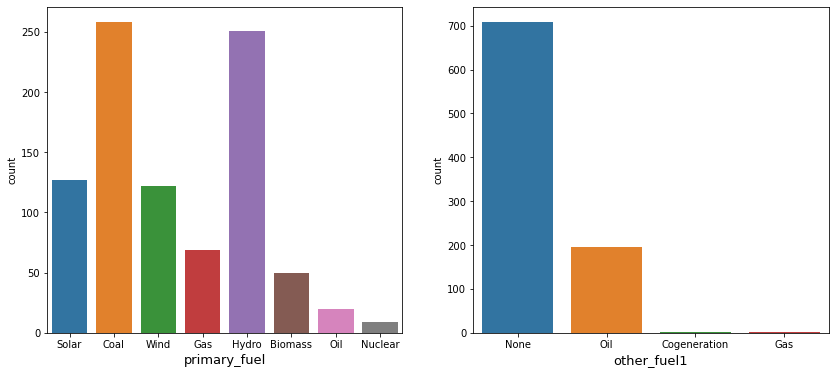

In [26]:
# let's see the count plot of the categorical-data columns that we have.
features_cat= df[['primary_fuel','other_fuel1']]
plt.figure(figsize=(14,6))
for i in enumerate(features_cat):
    plt.subplot(1,2,i[0]+1)
    sns.countplot(x=i[1],data=df)
    plt.xlabel(i[1],fontsize=13)
    
# Observations:
# 1. Powerplants with Coal and Hydro as primary fuel have much higher count than others.
# 2. Majority of powerplants don't have a secondary fuel source.

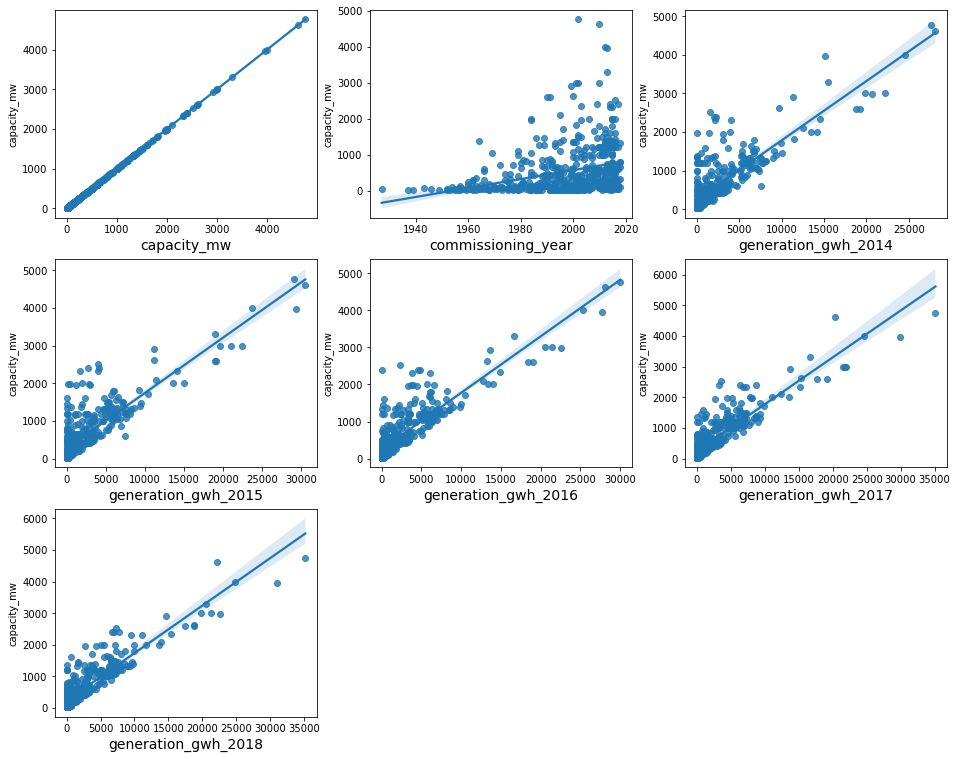

In [27]:
# Let's see the regplot of the continuous-data columns with 'capacity_mw'.
plt.figure(figsize=(16,13))
plotnumber=1
for i in features_cont:
    if plotnumber<=9:
        ax= plt.subplot(3,3,plotnumber)
        sns.regplot(x=df[i],y=df['capacity_mw'])
        plt.xlabel(i,fontsize=14)
    plotnumber+=1
plt.show()

# the 'generation_gwh' for different years have a strong positive linear relation with 'capacity_mw'.
# 'commissioning_year' have a weak positive linear relation with 'capaciy_mw'.

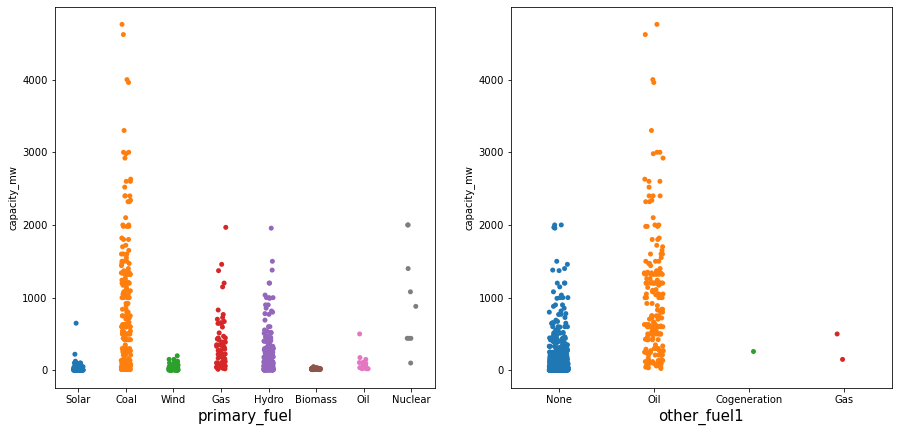

In [28]:
# Let's see the stripplot of the categorical-data columns with 'capacity_mw'.
plt.figure(figsize=(15,7))
plotnumber=1
for i in features_cat:
    if plotnumber<=2:
        ax= plt.subplot(1,2,plotnumber)
        sns.stripplot(x=df[i],y=df['capacity_mw'])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

# Observations:
# 1. Powerplants with coal as primary fuel are the only ones to reach capacity beyond 2000mw.
# 2. Similarly powerplants with oil as secondary fuel are the only ones to reach capacity beyond 2000mw.
# 3. Those having solar, wind, biomass or oil as primary fuel have lesser capacity.(<1000mw).

Text(0, 0.5, 'latitude')

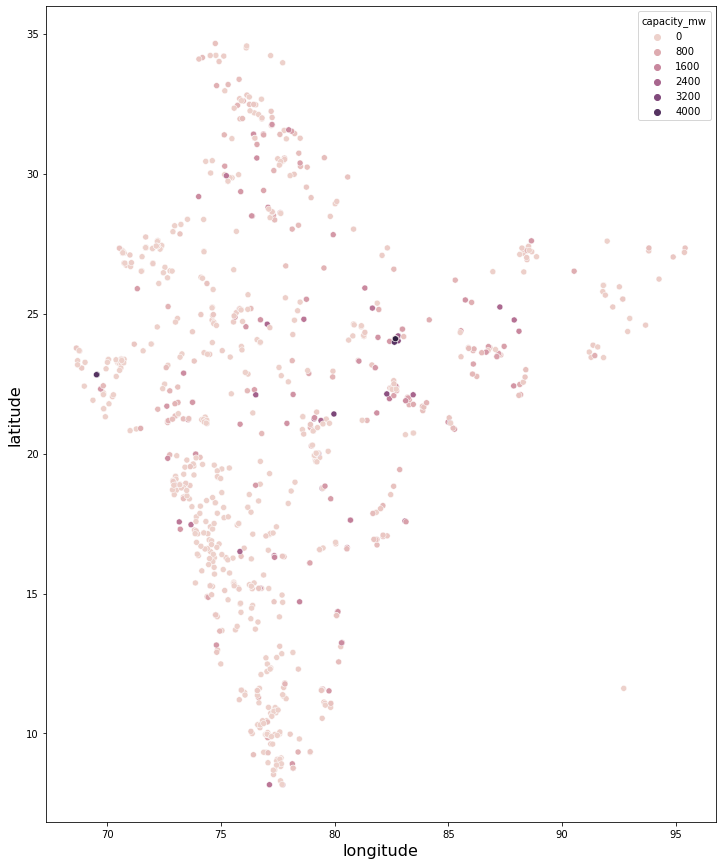

In [29]:
# Let's see the scatterplot of latitude vs longitude with color-coding of powerplant's capacity.
plt.figure(figsize=(12,15))
sns.scatterplot(x='longitude',y='latitude',hue='capacity_mw',data=df)
plt.xlabel("longitude",fontsize=16)
plt.ylabel("latitude",fontsize=16)

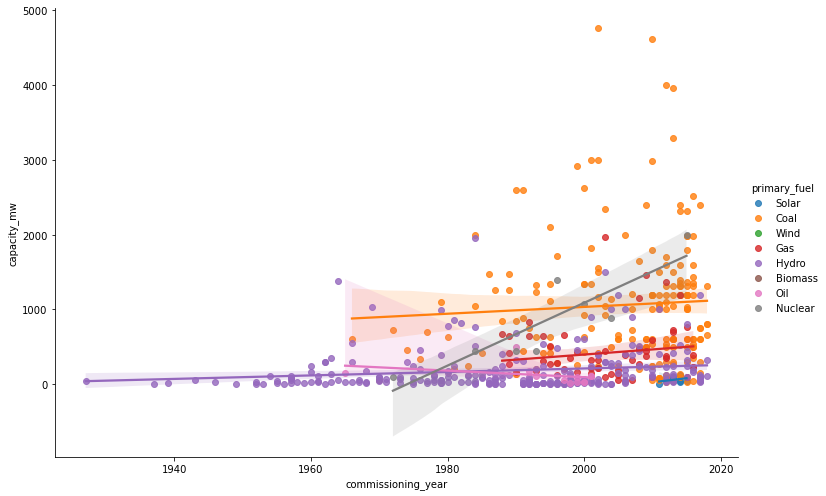

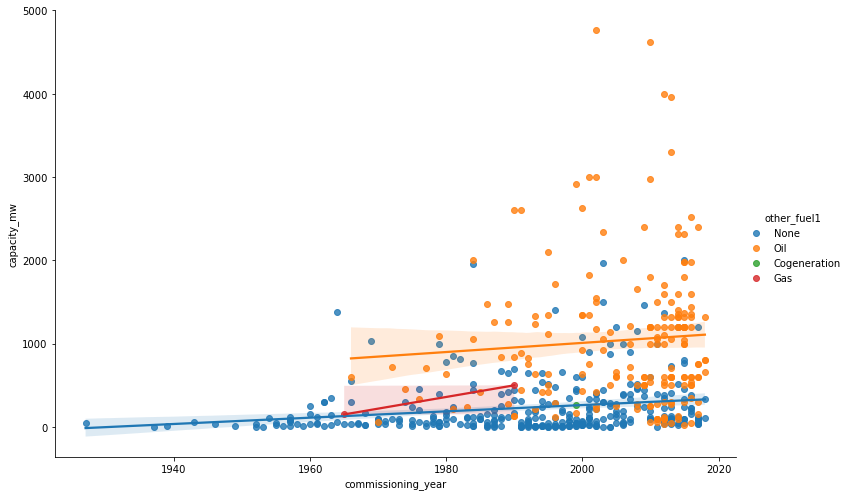

In [30]:
# Let's see the lmplot of commissioning year vs capacity with color coding of primary fuels and other_fuels used.
for i in features_cat:    
    sns.lmplot(x='commissioning_year', y="capacity_mw", hue=i, data=df, height=7, aspect=3/2)
    
# Almost all of the powerplants commissioned before 1960 are hydroelectric in nature.
# Out of all the powerplants built in the last 2-3 decades, coal-fired reaches the highest capacity.
# Solar power plants are a recent phenomena in India. 
# The capacity of nuclear power plants have risen steadily over the years.(the gray line with a higher positive slope).

# Most of the powerplants with high capacity(>2000mw) uses oil as secondary fuel.
# Gas as a secondary fuel is used in some powerplants but it seems the trend has stopped and newly commisioned ones doesn't use it anymore.

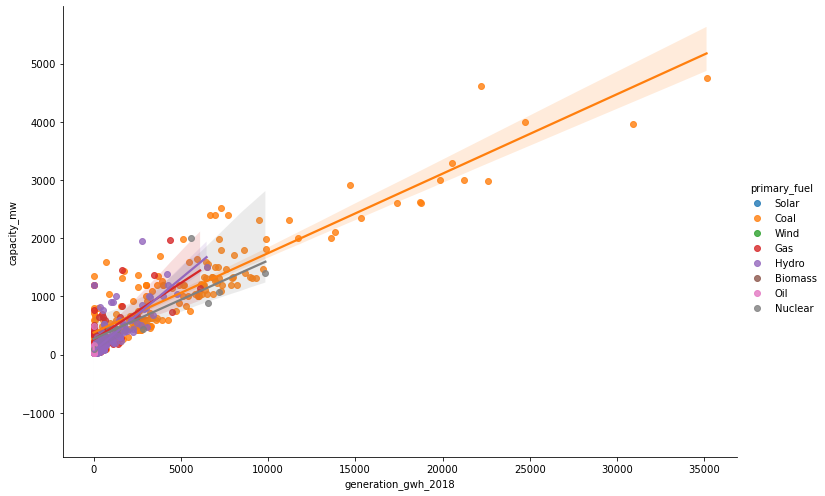

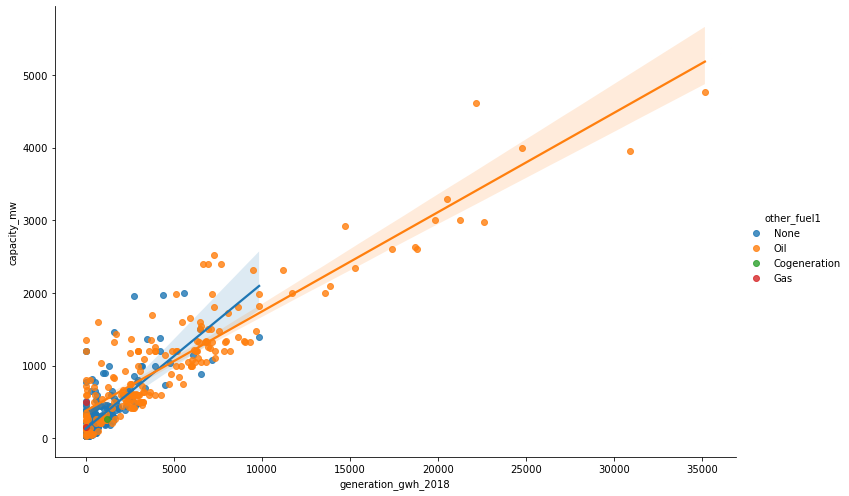

In [31]:
# Let's see the lmplot of generation_gwh_2018 vs capacity with color coding of primary fuels and other fuels used.
for i in features_cat:    
    sns.lmplot(x='generation_gwh_2018', y="capacity_mw", hue=i, data=df, height=7, aspect=3/2)
    
# We have already seen the strong positive linear relation between generation_gwh_2018 and capacity_mw. From the below plot we can
# see that most of the powerplants at higher side of generation are coal fired.

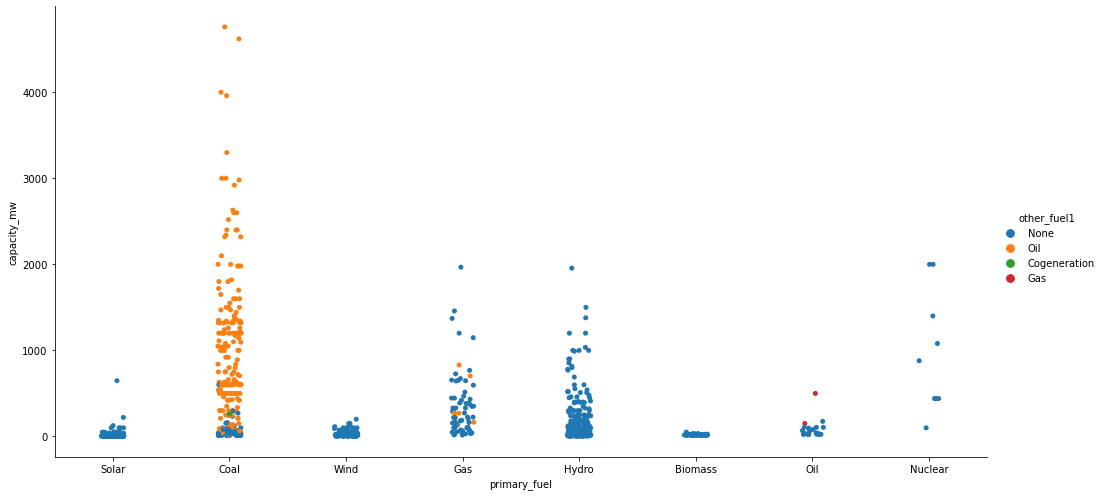

In [32]:
# Lets see the catplot of primary fuel vs capacity with color coding of secondary fuels.
sns.catplot(x='primary_fuel',y='capacity_mw',hue='other_fuel1',kind='strip',data=df, height=7,aspect=2/1)

# It can be seen that oil is used as secondary source mainly in coal-fired powerplants.
# Coal as primary and oil as secondary fuel gives better capacity and thus generation.
# Plants having solar, wind, hydro, biomass and nuclear as primary fuel doesn't use a secondary fuel. 

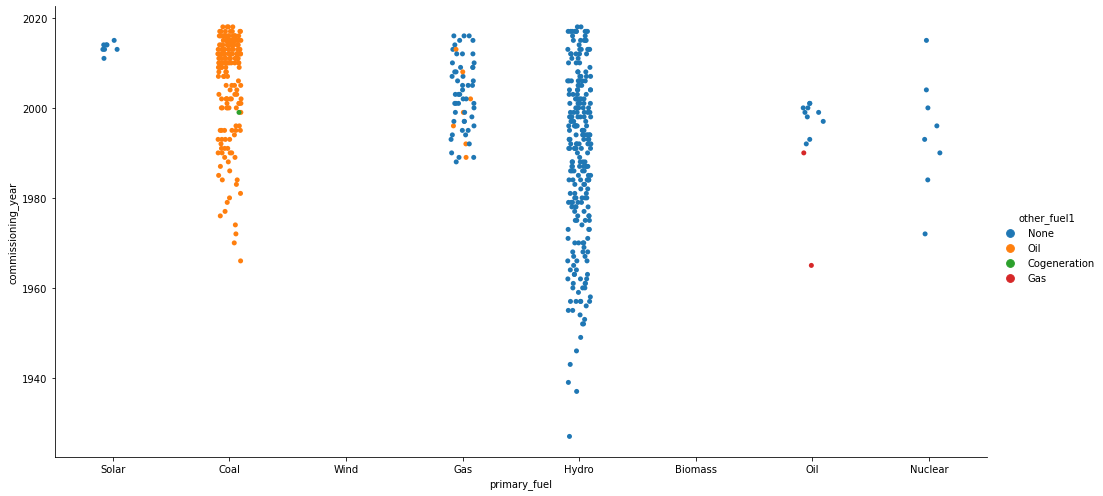

In [33]:
# Lets see the catplot of primary fuel vs commissioning year with color coding of secondary fuels.
sns.catplot(y='commissioning_year',x='primary_fuel',hue='other_fuel1',kind='strip',data=df, height=7,aspect=2/1)

# Solar power plants are a recent phenomena(after year 2000)
# Hydroelectric powerplants are the oldest type and are still relavant and many commissioned recently.

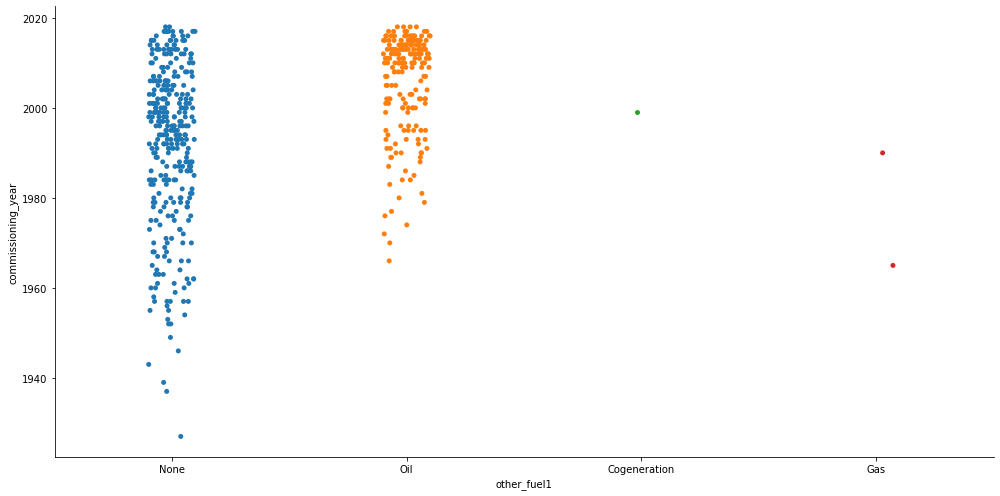

In [34]:
# Plot of commissioning year vs other_fuel.
sns.catplot(y='commissioning_year',x='other_fuel1',kind='strip',data=df, height=7,aspect=2/1)

In [35]:
# Encoding the object datatype categorical columns using LabelEncoder.

from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()
df['primary_fuel']= enc.fit_transform(df[['primary_fuel']])
df['other_fuel1']= enc.fit_transform(df[['other_fuel1']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          906 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         906 non-null    int32  
 4   other_fuel1          906 non-null    int32  
 5   commissioning_year   527 non-null    float64
 6   generation_gwh_2014  398 non-null    float64
 7   generation_gwh_2015  422 non-null    float64
 8   generation_gwh_2016  434 non-null    float64
 9   generation_gwh_2017  440 non-null    float64
 10  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), int32(2)
memory usage: 70.9 KB


In [37]:
# Using KNN Imputer to fillup the missing values.
from sklearn.impute import KNNImputer
imputer_knn= KNNImputer(n_neighbors=5)
imputed_df= pd.DataFrame(imputer_knn.fit_transform(df),columns=df.columns)
df= imputed_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          906 non-null    float64
 1   latitude             906 non-null    float64
 2   longitude            906 non-null    float64
 3   primary_fuel         906 non-null    float64
 4   other_fuel1          906 non-null    float64
 5   commissioning_year   906 non-null    float64
 6   generation_gwh_2014  906 non-null    float64
 7   generation_gwh_2015  906 non-null    float64
 8   generation_gwh_2016  906 non-null    float64
 9   generation_gwh_2017  906 non-null    float64
 10  generation_gwh_2018  906 non-null    float64
dtypes: float64(11)
memory usage: 78.0 KB


In [38]:
# Let's see the plots after using KNN Imputer. It should be noted that nearly half of the generation_gwh data is imputed values now.

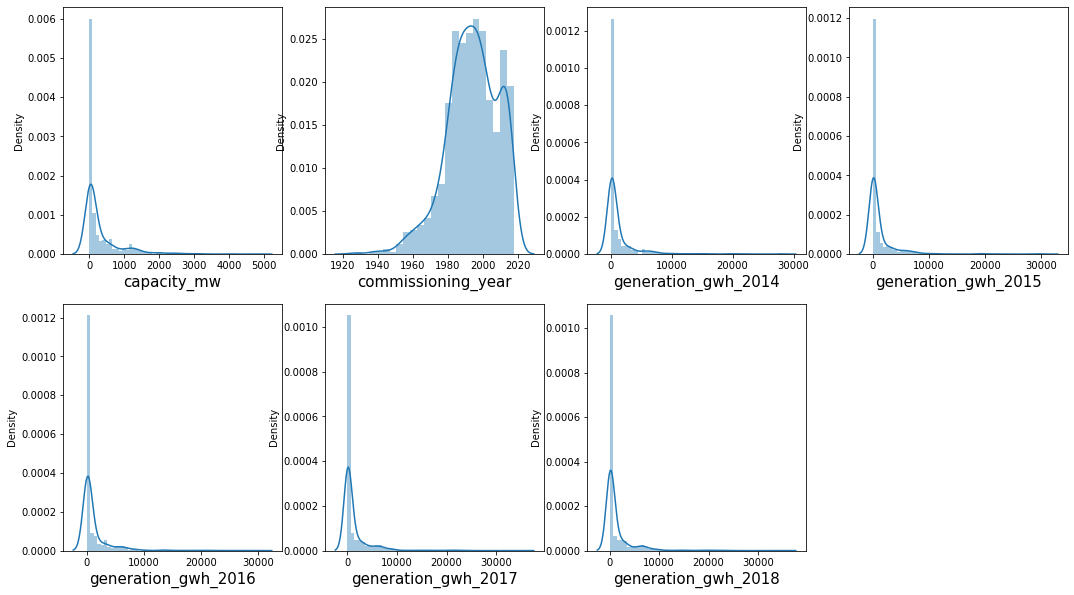

In [39]:
features_cont= df[['capacity_mw','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
                  'generation_gwh_2017','generation_gwh_2018']]
plt.figure(figsize=(18,10))
plotnumber=1
for column in features_cont:
    if plotnumber<=8:
        ax= plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

# The plots are almost same as before imputing. 

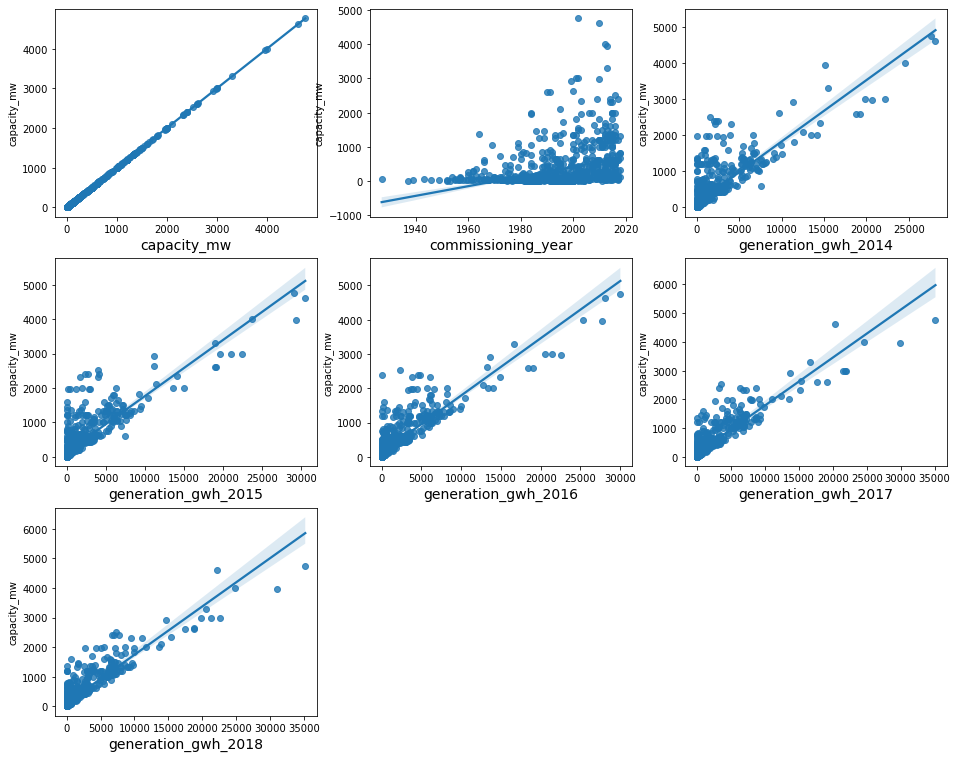

In [40]:
plt.figure(figsize=(16,13))
plotnumber=1
for i in features_cont:
    if plotnumber<=9:
        ax= plt.subplot(3,3,plotnumber)
        sns.regplot(x=df[i],y=df['capacity_mw'])
        plt.xlabel(i,fontsize=14)
    plotnumber+=1
plt.show()

# the 'generation_gwh' for different years still have a strong positive linear relation with 'capacity_mw' after imputation.

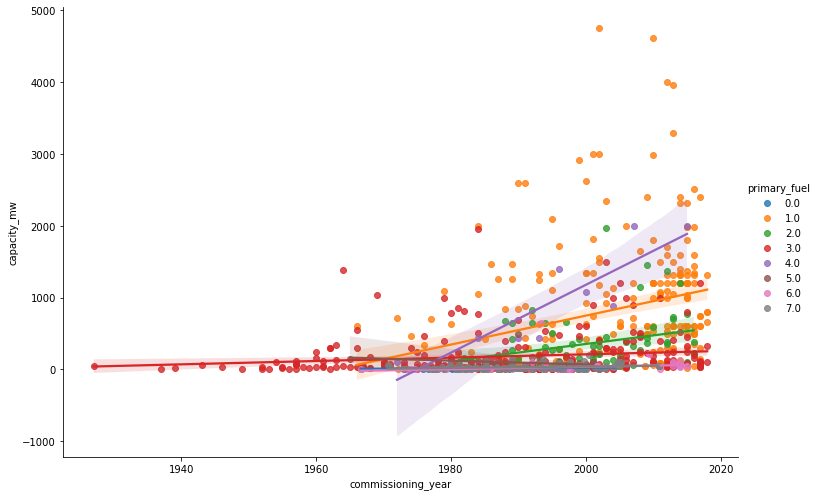

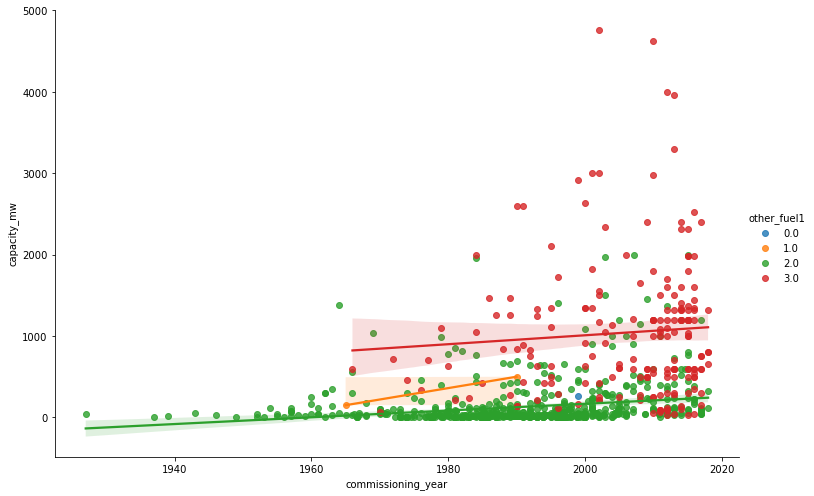

In [41]:
# Plot after imputation is almost the same.
for i in features_cat:    
    sns.lmplot(x='commissioning_year', y="capacity_mw", hue=i, data=df, height=7, aspect=3/2)

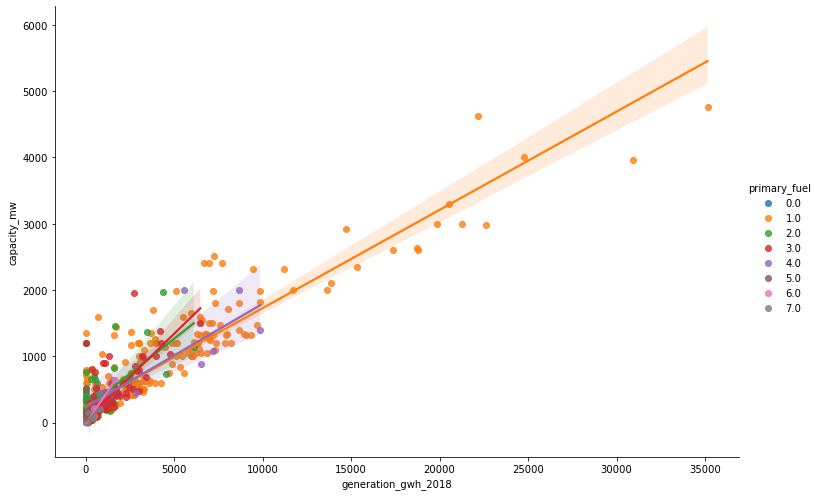

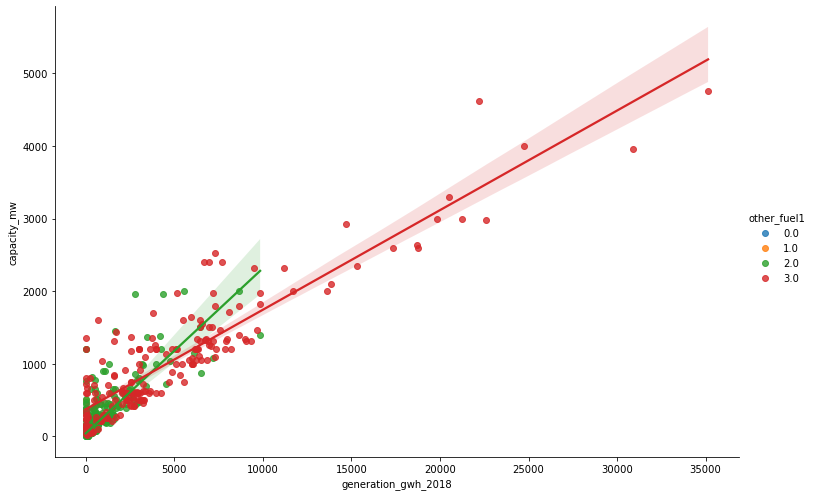

In [42]:
# Plot after imputation is almost the same.
for i in features_cat:    
    sns.lmplot(x='generation_gwh_2018', y="capacity_mw", hue=i, data=df, height=7, aspect=3/2)

<AxesSubplot:>

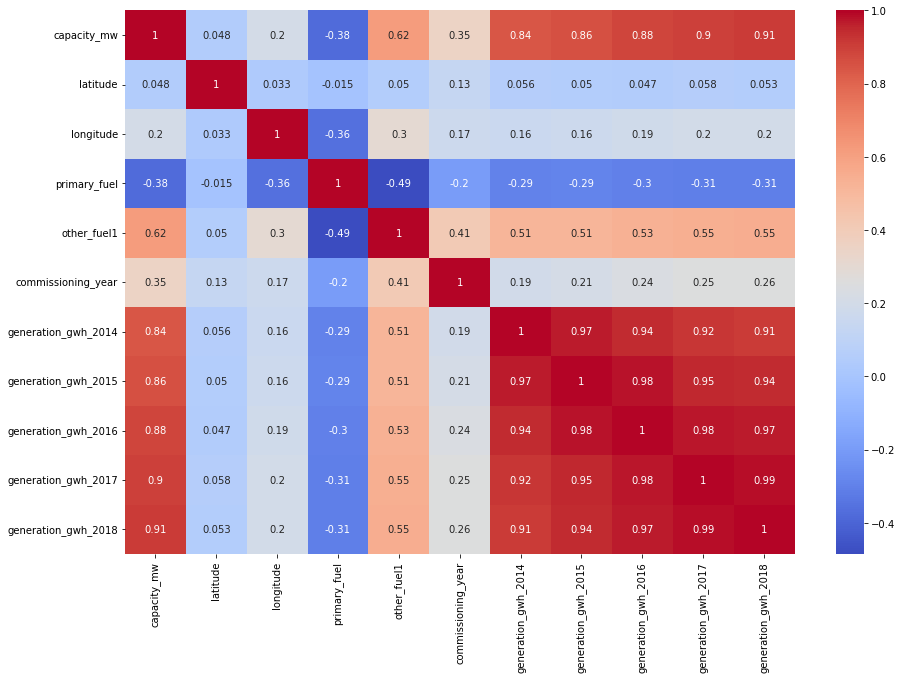

In [43]:
# Let's see the correlation heat-map.
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

# capacity_mw and generation_gwh seems to have a very strong correlation.
# the generation_gwh for different years have a multicollinearity problem.

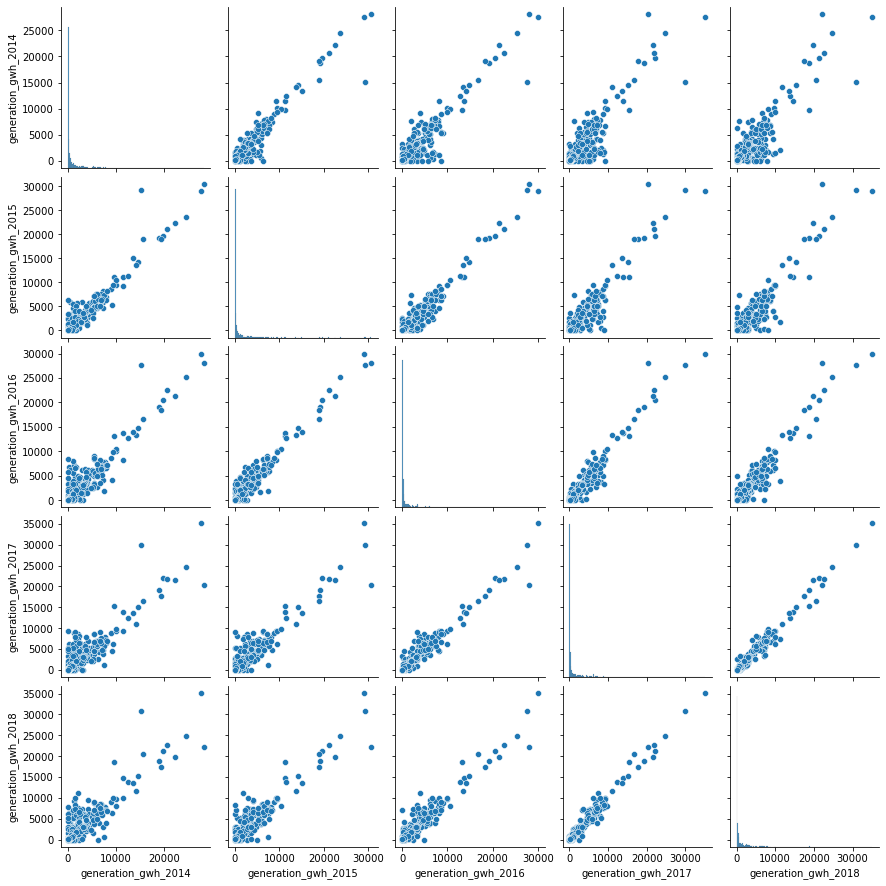

In [44]:
# Let's see the pairplot of generation_gwh for different years.
yearly_generation_df= df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
                          'generation_gwh_2017','generation_gwh_2018']]

sns.pairplot(yearly_generation_df)

# A positive linear relation can be seen among them.

In [45]:
# Let's see the correlation of 'capacity_mw' with other variables.
np.abs(corr["capacity_mw"]).sort_values(ascending= False)

capacity_mw            1.000000
generation_gwh_2018    0.912134
generation_gwh_2017    0.900255
generation_gwh_2016    0.884156
generation_gwh_2015    0.856317
generation_gwh_2014    0.841083
other_fuel1            0.619326
primary_fuel           0.380086
commissioning_year     0.353133
longitude              0.203826
latitude               0.047923
Name: capacity_mw, dtype: float64

In [46]:
# dropping the generation_gwh columns except the 2018 year. generation_gwh_2018 has highest correlation with capacity.
df.drop(columns=['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017'],inplace=True)

<AxesSubplot:>

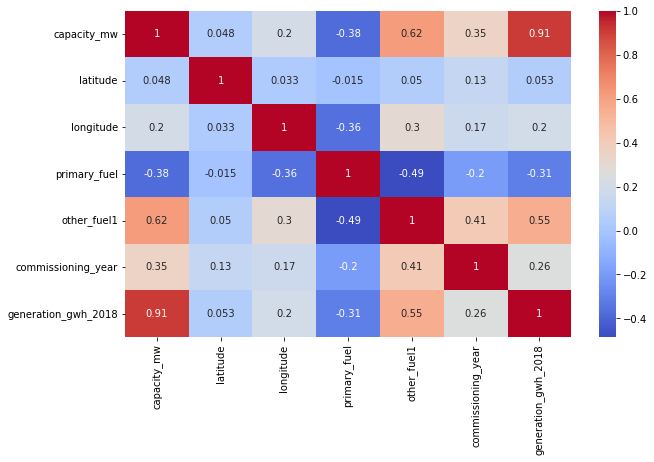

In [47]:
# Let's see the correlation heat-map.
corr=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")

# No multicollinearity problem among the features can be seen.

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

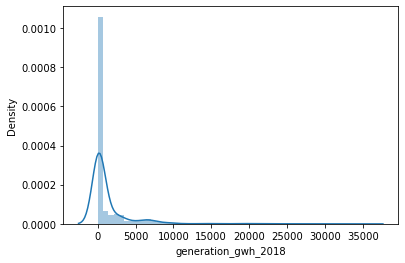

In [48]:
sns.distplot(df['generation_gwh_2018'])

# The distribution plot is highly skewed towards right. But the higher values cannot be termed as outliers as we have already 
# seen that some powerplants(coal+oil fired) have much higher generation as compared to others. We can't lose this information 
# by removal of 'outliers'.

In [49]:
# Using power transformer to reduce the skewness in 'generation_gwh_2018' column.
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(method="yeo-johnson")

df['generation_gwh_2018']= pt.fit_transform(df[['generation_gwh_2018']])

In [50]:
# Separating the features and label.
X= df.drop(columns=['capacity_mw'])
y= df['capacity_mw']

In [51]:
# applying standard scaler on the features and scaling them.
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [52]:
# checking the variance-inflation-factor among our features.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

# No multicollinearity issues can be seen.

        vif             Features
0  1.037917             latitude
1  1.200459            longitude
2  1.412705         primary_fuel
3  1.797795          other_fuel1
4  1.223754   commissioning_year
5  1.422510  generation_gwh_2018


In [53]:
############################################### LINEAR REGRESSION ##############################################################

from sklearn.linear_model import LinearRegression
lr= LinearRegression()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    
    lr.fit(x_train,y_train)

    y_pred_train = lr.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= lr.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 56.46
Testing Score for sample 0 : 56.47
Mean Absolute Error 234.23
Root Mean Squared Error 433.56


Training Score for sample 1 : 58.91
Testing Score for sample 1 : 50.24
Mean Absolute Error 236.33
Root Mean Squared Error 500.09


Training Score for sample 2 : 54.67
Testing Score for sample 2 : 62.65
Mean Absolute Error 233.43
Root Mean Squared Error 354.63


Training Score for sample 3 : 56.4
Testing Score for sample 3 : 56.59
Mean Absolute Error 216.07
Root Mean Squared Error 424.42


Training Score for sample 4 : 57.61
Testing Score for sample 4 : 50.52
Mean Absolute Error 212.48
Root Mean Squared Error 384.29


Training Score for sample 5 : 56.22
Testing Score for sample 5 : 57.01
Mean Absolute Error 245.08
Root Mean Squared Error 415.35


Training Score for sample 6 : 56.71
Testing Score for sample 6 : 54.97
Mean Absolute Error 218.53
Root Mean Squared Error 420.86


Training Score for sample 7 : 56.05
Testing Score for sample 7 : 58.26
Mean Absolute

In [54]:
############################################### ADABOOST REGRESSION ############################################################

from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    
    ada.fit(x_train, y_train)

    y_pred_train = ada.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= ada.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 77.19
Testing Score for sample 0 : 81.84
Mean Absolute Error 246.54
Root Mean Squared Error 294.09


Training Score for sample 1 : 77.37
Testing Score for sample 1 : 75.94
Mean Absolute Error 286.39
Root Mean Squared Error 344.7


Training Score for sample 2 : 84.67
Testing Score for sample 2 : 76.94
Mean Absolute Error 225.56
Root Mean Squared Error 265.25


Training Score for sample 3 : 82.82
Testing Score for sample 3 : 75.94
Mean Absolute Error 248.92
Root Mean Squared Error 296.11


Training Score for sample 4 : 87.48
Testing Score for sample 4 : 74.0
Mean Absolute Error 207.26
Root Mean Squared Error 259.13


Training Score for sample 5 : 82.83
Testing Score for sample 5 : 76.01
Mean Absolute Error 245.96
Root Mean Squared Error 288.3


Training Score for sample 6 : 85.15
Testing Score for sample 6 : 84.22
Mean Absolute Error 203.51
Root Mean Squared Error 251.05


Training Score for sample 7 : 82.88
Testing Score for sample 7 : 79.61
Mean Absolute E

In [55]:
############################################## RANDOM FOREST REGRESSION ########################################################

from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_jobs=-1)

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)
   
    rf.fit(x_train,y_train)

    y_pred_train = rf.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= rf.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 97.68
Testing Score for sample 0 : 92.72
Mean Absolute Error 90.57
Root Mean Squared Error 177.34


Training Score for sample 1 : 97.93
Testing Score for sample 1 : 88.17
Mean Absolute Error 117.24
Root Mean Squared Error 243.88


Training Score for sample 2 : 98.01
Testing Score for sample 2 : 85.86
Mean Absolute Error 117.98
Root Mean Squared Error 218.18


Training Score for sample 3 : 98.2
Testing Score for sample 3 : 86.04
Mean Absolute Error 122.49
Root Mean Squared Error 240.69


Training Score for sample 4 : 98.19
Testing Score for sample 4 : 82.54
Mean Absolute Error 106.72
Root Mean Squared Error 228.31


Training Score for sample 5 : 98.05
Testing Score for sample 5 : 85.25
Mean Absolute Error 124.33
Root Mean Squared Error 243.29


Training Score for sample 6 : 97.94
Testing Score for sample 6 : 88.1
Mean Absolute Error 103.6
Root Mean Squared Error 216.39


Training Score for sample 7 : 98.09
Testing Score for sample 7 : 88.8
Mean Absolute Err

In [56]:
######################################### XTREME-GRADIENT BOOST REGRESSION #####################################################

import xgboost as xgb
xgb_reg= xgb.XGBRegressor()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    
    xgb_reg.fit(x_train,y_train)

    y_pred_train = xgb_reg.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= xgb_reg.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 99.98
Testing Score for sample 0 : 87.15
Mean Absolute Error 120.47
Root Mean Squared Error 235.57


Training Score for sample 1 : 99.98
Testing Score for sample 1 : 85.9
Mean Absolute Error 132.65
Root Mean Squared Error 266.26


Training Score for sample 2 : 99.99
Testing Score for sample 2 : 85.17
Mean Absolute Error 119.51
Root Mean Squared Error 223.46


Training Score for sample 3 : 99.99
Testing Score for sample 3 : 83.88
Mean Absolute Error 127.84
Root Mean Squared Error 258.66


Training Score for sample 4 : 99.99
Testing Score for sample 4 : 80.57
Mean Absolute Error 109.67
Root Mean Squared Error 240.82


Training Score for sample 5 : 99.99
Testing Score for sample 5 : 83.48
Mean Absolute Error 126.29
Root Mean Squared Error 257.49


Training Score for sample 6 : 99.99
Testing Score for sample 6 : 88.53
Mean Absolute Error 100.87
Root Mean Squared Error 212.39


Training Score for sample 7 : 99.99
Testing Score for sample 7 : 85.5
Mean Absolute 

In [57]:
############################################## K-NEIGHBORS REGRESSION ##########################################################

from sklearn.neighbors import KNeighborsRegressor
knr= KNeighborsRegressor()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)
   
    knr.fit(x_train,y_train)

    y_pred_train = knr.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= knr.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 80.76
Testing Score for sample 0 : 78.56
Mean Absolute Error 139.2
Root Mean Squared Error 304.3


Training Score for sample 1 : 82.34
Testing Score for sample 1 : 73.73
Mean Absolute Error 156.14
Root Mean Squared Error 363.38


Training Score for sample 2 : 84.34
Testing Score for sample 2 : 70.1
Mean Absolute Error 169.35
Root Mean Squared Error 317.33


Training Score for sample 3 : 82.03
Testing Score for sample 3 : 76.98
Mean Absolute Error 141.72
Root Mean Squared Error 309.08


Training Score for sample 4 : 82.74
Testing Score for sample 4 : 80.19
Mean Absolute Error 113.61
Root Mean Squared Error 243.14


Training Score for sample 5 : 82.31
Testing Score for sample 5 : 78.44
Mean Absolute Error 141.42
Root Mean Squared Error 294.1


Training Score for sample 6 : 82.02
Testing Score for sample 6 : 78.29
Mean Absolute Error 126.19
Root Mean Squared Error 292.24


Training Score for sample 7 : 82.63
Testing Score for sample 7 : 78.67
Mean Absolute Er

In [ ]:
# Random Forests is giving the best testing score and have lowest Mean Absolute Error among all the above models.
# Let's try to tune it further.

In [62]:
#Hyperparameter tuning of Random Forests Regressor using GridSearchCV.

params= {"n_estimators": [250,500,1000],
         "max_depth":[4,5,6,8],
         "min_samples_split": range(2,4)        
         }
grd_rf= GridSearchCV(rf, param_grid=params,cv=5,n_jobs=-1)
grd_rf.fit(x_train,y_train)
print("Best Parameters:",grd_rf.best_params_)

Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 250}


In [64]:
# Taking the best sample split result and applying on the tuned model.
rf_tuned= grd_rf.best_estimator_
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

rf_tuned.fit(x_train,y_train)
y_pred_train = rf_tuned.predict(x_train)
accuracy_train = r2_score(y_train,y_pred_train)
y_pred= rf_tuned.predict(x_test)
accuracy_test = r2_score(y_test,y_pred)

print("Training Score for best sample",round(accuracy_train*100,2))
print("Testing Score for best sample:",round(accuracy_test*100,2))
print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

# cross-validating the random forests regression model.
print("\n++++++++++++++ CROSS VALIDATION ++++++++++++++++","\n")
for i in range(5,10):
    cv_score= cross_val_score(rf_tuned,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

Training Score for best sample 93.17
Testing Score for best sample: 93.74
Mean Absolute Error 89.99
Root Mean Squared Error 164.42

++++++++++++++ CROSS VALIDATION ++++++++++++++++ 

the cv score for 5 fold: 84.99
the cv score for 6 fold: 85.52
the cv score for 7 fold: 85.0
the cv score for 8 fold: 85.18
the cv score for 9 fold: 84.77


In [65]:
# cross-validating the linear regression model.
for i in range(5,10):
    cv_score= cross_val_score(lr,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 53.63
the cv score for 6 fold: 53.12
the cv score for 7 fold: 54.13
the cv score for 8 fold: 54.4
the cv score for 9 fold: 52.33


In [66]:
# cross-validating the adaboost regression model.
for i in range(5,10):
    cv_score= cross_val_score(ada,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 74.88
the cv score for 6 fold: 74.45
the cv score for 7 fold: 77.56
the cv score for 8 fold: 74.28
the cv score for 9 fold: 75.3


In [67]:
# cross-validating the xgboost regression model.
for i in range(5,10):
    cv_score= cross_val_score(xgb_reg,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 81.65
the cv score for 6 fold: 84.81
the cv score for 7 fold: 83.91
the cv score for 8 fold: 82.92
the cv score for 9 fold: 82.67


In [68]:
# cross-validating the knn regression model.
for i in range(5,10):
    cv_score= cross_val_score(knr,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 70.24
the cv score for 6 fold: 70.27
the cv score for 7 fold: 72.29
the cv score for 8 fold: 71.22
the cv score for 9 fold: 72.17


In [69]:
# saving the tuned random forests model using pickle.
import pickle 

Power_Plant_reg= "Power_Plant_reg_model.pickle"
pickle.dump(rf_tuned, open(Power_Plant_reg,'wb'))

# Part2: Classification task of predicting the 'primary_fuel'

In [70]:
# getting the data.
df= pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [71]:
# Repeating the initial preprocessing steps as done in the regression task above.
df.drop(columns=['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019',
                 'estimated_generation_gwh'],inplace=True)

df.drop(columns=['country','country_long','name','gppd_idnr','owner','source','url','generation_data_source',
                 'geolocation_source','year_of_capacity_data'],inplace=True)

df['other_fuel1']= df['other_fuel1'].replace(np.nan,"None")

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          907 non-null    object 
 5   commissioning_year   527 non-null    float64
 6   generation_gwh_2014  398 non-null    float64
 7   generation_gwh_2015  422 non-null    float64
 8   generation_gwh_2016  434 non-null    float64
 9   generation_gwh_2017  440 non-null    float64
 10  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(2)
memory usage: 78.1+ KB


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

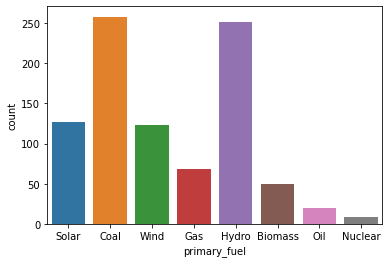

In [73]:
# Let's see the countplot of our target variable.
sns.countplot(x='primary_fuel',data=df)

Text(0, 0.5, 'latitude')

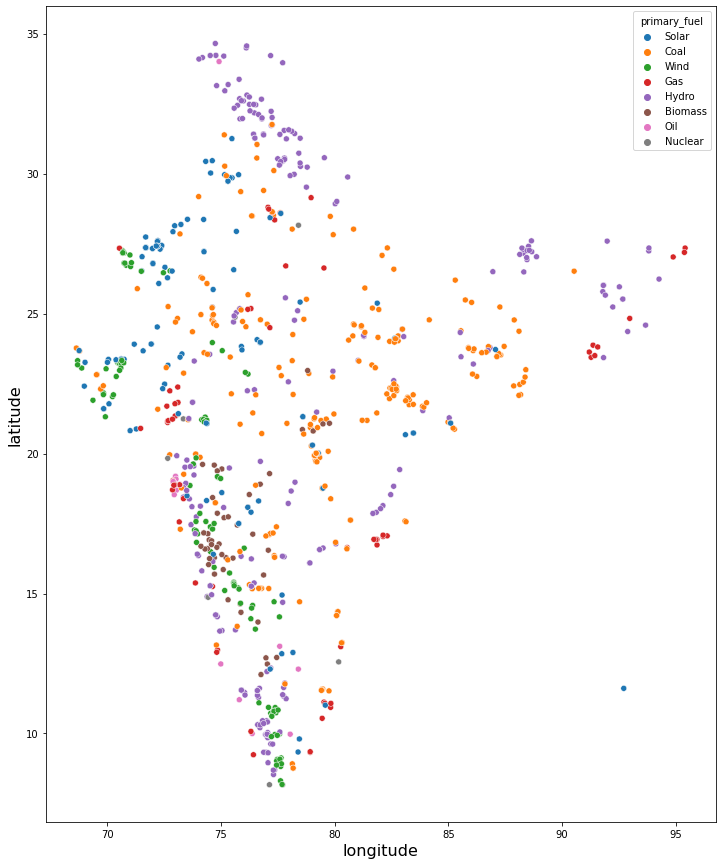

In [74]:
# Let's see the scatterplot of latitude vs longitude with color coding of various primary_fuel used.
plt.figure(figsize=(12,15))
sns.scatterplot(x='longitude',y='latitude',hue='primary_fuel',data=df)
plt.xlabel("longitude",fontsize=16)
plt.ylabel("latitude",fontsize=16)

# Most of the hydroelectric plants can be seen in the himalayan states, north-east states and along the eastern and western ghats.

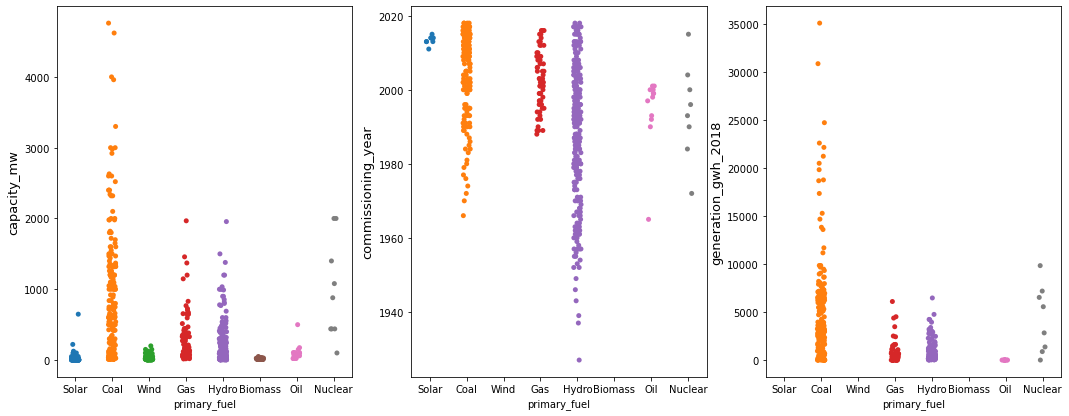

In [75]:
# Let's see the stripplot of the continuous-data columns with 'primary_fuel'.
features_cont= df[['capacity_mw','commissioning_year','generation_gwh_2018']]
plt.figure(figsize=(18,15))
for i in enumerate(features_cont):
    plt.subplot(2,3,i[0]+1)
    sns.stripplot(x='primary_fuel',y=i[1],data=df)
    plt.ylabel(i[1],fontsize=13)
    
# 1. Powerplants with coal as primary fuel are the only ones to reach capacity beyond 2000mw.
# 2. Those having solar, wind, biomass or oil as primary fuel have lesser capacity.(<1000mw).
# 3. Hydroelectric powerplants are the oldest type and are still relavant and many commissioned recently.
# 4. Powerplants with coal as primary fuel are the only ones to reach generation beyond 10000gwh.

Text(0.5, 0, 'other_fuel1')

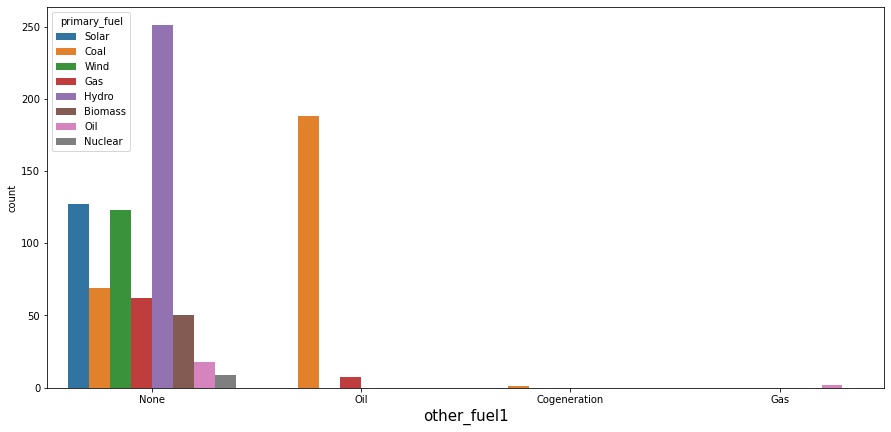

In [76]:
# Let's see the countplot of the other_fuels with color coding of 'primary_fuel'.
plt.figure(figsize=(15,7))
sns.countplot(x='other_fuel1',hue='primary_fuel',data=df)
plt.xlabel('other_fuel1',fontsize=15)

# Most of the powerplants with no secondary fuel are hydroelectric.
# A high majority of powerplants with oil as secondary fuel have coal as primary fuel.

In [77]:
# Encoding the object datatype categorical columns using LabelEncoder.
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()
df['primary_fuel']= enc.fit_transform(df[['primary_fuel']])
df['other_fuel1']= enc.fit_transform(df[['other_fuel1']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    int32  
 4   other_fuel1          907 non-null    int32  
 5   commissioning_year   527 non-null    float64
 6   generation_gwh_2014  398 non-null    float64
 7   generation_gwh_2015  422 non-null    float64
 8   generation_gwh_2016  434 non-null    float64
 9   generation_gwh_2017  440 non-null    float64
 10  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), int32(2)
memory usage: 71.0 KB


In [78]:
# Imputing the missing values using KNN Imputer.
from sklearn.impute import KNNImputer
imputer_knn= KNNImputer(n_neighbors=5)
imputed_df= pd.DataFrame(imputer_knn.fit_transform(df),columns=df.columns)
df= imputed_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    float64
 4   other_fuel1          907 non-null    float64
 5   commissioning_year   907 non-null    float64
 6   generation_gwh_2014  907 non-null    float64
 7   generation_gwh_2015  907 non-null    float64
 8   generation_gwh_2016  907 non-null    float64
 9   generation_gwh_2017  907 non-null    float64
 10  generation_gwh_2018  907 non-null    float64
dtypes: float64(11)
memory usage: 78.1 KB


In [79]:
# dropping the columns with multicollinearity problems which we saw in the regression task.
df.drop(columns=['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017'],inplace=True)

<AxesSubplot:>

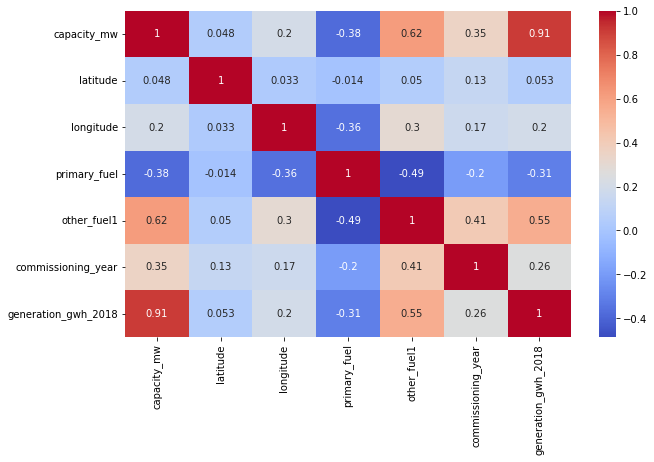

In [80]:
# Let's see the correlation heat-map.
corr=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")

# No multicollinearity problems can be seen.

In [81]:
# Let's see the correlation of 'primary_fuel' with other variables.
np.abs(corr["primary_fuel"]).sort_values(ascending= False)

primary_fuel           1.000000
other_fuel1            0.485250
capacity_mw            0.380395
longitude              0.362993
generation_gwh_2018    0.309942
commissioning_year     0.200252
latitude               0.014326
Name: primary_fuel, dtype: float64

In [82]:
# Separating the features and label.
X= df.drop(columns=['primary_fuel'])
y= df['primary_fuel']

In [83]:
# applying standard scaler on the features and scaling them.
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [84]:
# checking the variance-inflation-factor among our features.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

        vif             Features
0  7.087219          capacity_mw
1  1.019806             latitude
2  1.106327            longitude
3  1.822218          other_fuel1
4  1.283872   commissioning_year
5  6.158587  generation_gwh_2018


In [85]:
# dropping the generation_gwh_2018 as it has a multicollinearity problem with capacity_mw.
# Since capacity_mw has a higher correlation with our target variable hence choosing to keep it and drop generation_gwh_2018.
df.drop(columns=['generation_gwh_2018'],inplace=True)

In [86]:
# Separating the features and label.
X= df.drop(columns=['primary_fuel'])
y= df['primary_fuel']

# applying standard scaler on the features and scaling them.
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [87]:
# checking the variance-inflation-factor among our features.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

# No multicollinearity issues can be seen as all values are under acceptable level.

        vif            Features
0  1.654581         capacity_mw
1  1.017842            latitude
2  1.103805           longitude
3  1.821886         other_fuel1
4  1.246508  commissioning_year


In [88]:
############################################## LOGISTIC REGRESSION #############################################################

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i,stratify=y)
   
    lr.fit(x_train, y_train)

    y_pred_train = lr.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= lr.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2)) 
    print("\n")

Training Score for sample 0 : 58.82
Testing Score for sample 0 : 57.27


Training Score for sample 1 : 58.97
Testing Score for sample 1 : 58.59


Training Score for sample 2 : 60.59
Testing Score for sample 2 : 59.03


Training Score for sample 3 : 59.26
Testing Score for sample 3 : 56.83


Training Score for sample 4 : 59.41
Testing Score for sample 4 : 62.11


Training Score for sample 5 : 57.94
Testing Score for sample 5 : 61.67


Training Score for sample 6 : 57.65
Testing Score for sample 6 : 61.67


Training Score for sample 7 : 60.15
Testing Score for sample 7 : 59.91


Training Score for sample 8 : 59.26
Testing Score for sample 8 : 58.59


Training Score for sample 9 : 59.26
Testing Score for sample 9 : 56.39




In [89]:
############################################## RANDOM FOREST CLASSIFIER ########################################################

from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_jobs=-1)

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=i,stratify=y)

    rf.fit(x_train, y_train)

    y_pred_train = rf.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= rf.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))
    print("\n")
    

Training Score for sample 0 : 100.0
Testing Score for sample 0 : 76.21


Training Score for sample 1 : 100.0
Testing Score for sample 1 : 74.01


Training Score for sample 2 : 100.0
Testing Score for sample 2 : 74.89


Training Score for sample 3 : 100.0
Testing Score for sample 3 : 77.09


Training Score for sample 4 : 100.0
Testing Score for sample 4 : 79.74


Training Score for sample 5 : 100.0
Testing Score for sample 5 : 81.5


Training Score for sample 6 : 100.0
Testing Score for sample 6 : 71.37


Training Score for sample 7 : 100.0
Testing Score for sample 7 : 78.85


Training Score for sample 8 : 100.0
Testing Score for sample 8 : 78.41


Training Score for sample 9 : 100.0
Testing Score for sample 9 : 74.89




In [90]:
################################################## KNN CLASSIFIER ##############################################################

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y,random_state=i)
    
    knn.fit(x_train, y_train)

    y_pred_train = knn.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= knn.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))
    print("\n")

Training Score for sample 0 : 77.21
Testing Score for sample 0 : 68.72


Training Score for sample 1 : 75.44
Testing Score for sample 1 : 67.4


Training Score for sample 2 : 77.65
Testing Score for sample 2 : 66.08


Training Score for sample 3 : 76.91
Testing Score for sample 3 : 65.64


Training Score for sample 4 : 76.91
Testing Score for sample 4 : 69.6


Training Score for sample 5 : 75.74
Testing Score for sample 5 : 69.16


Training Score for sample 6 : 77.5
Testing Score for sample 6 : 65.64


Training Score for sample 7 : 78.24
Testing Score for sample 7 : 64.32


Training Score for sample 8 : 76.76
Testing Score for sample 8 : 65.64


Training Score for sample 9 : 77.94
Testing Score for sample 9 : 67.4




In [91]:
############################################## SUPPORT VECTOR MACHINE ##########################################################

from sklearn.svm import SVC
svc= SVC()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y,random_state=i)
    
    svc.fit(x_train, y_train)

    y_pred_train = svc.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= svc.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2)) 
    print("\n")

Training Score for sample 0 : 62.5
Testing Score for sample 0 : 59.91


Training Score for sample 1 : 62.06
Testing Score for sample 1 : 61.23


Training Score for sample 2 : 63.09
Testing Score for sample 2 : 58.15


Training Score for sample 3 : 62.06
Testing Score for sample 3 : 59.03


Training Score for sample 4 : 62.65
Testing Score for sample 4 : 62.56


Training Score for sample 5 : 61.76
Testing Score for sample 5 : 65.2


Training Score for sample 6 : 60.59
Testing Score for sample 6 : 58.15


Training Score for sample 7 : 63.09
Testing Score for sample 7 : 59.47


Training Score for sample 8 : 65.44
Testing Score for sample 8 : 62.56


Training Score for sample 9 : 62.65
Testing Score for sample 9 : 59.03




In [ ]:
# Random Forests is giving the best results as it has the highest accuracy score.
# Let's try to tune it further.

In [106]:
#Hyperparameter tuning of Random Forests Classifier using GridSearchCV.

params= {"n_estimators": [100,250,500,1000],
         "criterion":['gini','entropy'],
         "max_depth":[12,15,17,19],
         "min_samples_split": range(2,4)        
         }
grd_rf= GridSearchCV(rf, param_grid=params,cv=5)
grd_rf.fit(x_train,y_train)
print("Best Parameters:",grd_rf.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 3, 'n_estimators': 500}


In [108]:
# Taking the best sample split result and applying on the tuned Random Forests model.

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=5,stratify=y)
rf_tuned = grd_rf.best_estimator_
rf_tuned.fit(x_train, y_train)
    
y_pred_train = rf_tuned.predict(x_train)
accuracy_train = accuracy_score(y_train,y_pred_train)
print("Training Score:",round(accuracy_train*100,2))

y_pred= rf_tuned.predict(x_test)
accuracy_test = accuracy_score(y_test,y_pred)
print("Testing Score:",round(accuracy_test*100,2),"\n")

print("++++++++++++++ CLASSIFICATION REPORT ++++++++++++++++","\n")
print(classification_report(y_test,y_pred,digits=2))

print("++++++++++++++ CONFUSION MATRIX ++++++++++++++++")
print("\n",confusion_matrix(y_test,y_pred),"\n")

print("++++++++++++++ CROSS VALIDATION ++++++++++++++++","\n")
for i in range(5,10):
    cv_score= cross_val_score(rf_tuned,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

Training Score: 100.0
Testing Score: 81.94 

++++++++++++++ CLASSIFICATION REPORT ++++++++++++++++ 

              precision    recall  f1-score   support

         0.0       0.73      0.92      0.81        12
         1.0       0.87      0.92      0.90        65
         2.0       0.92      0.65      0.76        17
         3.0       0.77      0.89      0.82        63
         4.0       0.00      0.00      0.00         2
         5.0       0.50      0.20      0.29         5
         6.0       0.86      0.78      0.82        32
         7.0       0.81      0.71      0.76        31

    accuracy                           0.82       227
   macro avg       0.68      0.63      0.64       227
weighted avg       0.81      0.82      0.81       227

++++++++++++++ CONFUSION MATRIX ++++++++++++++++

 [[11  1  0  0  0  0  0  0]
 [ 0 60  0  4  0  0  0  1]
 [ 0  1 11  3  0  1  0  1]
 [ 2  1  0 56  0  0  3  1]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  0  4  0  1  0  0]
 [ 1  4  0  0  0  0 25  2]
 [ 1  2 

In [109]:
# cross-validating the logistic regression model.
for i in range(5,10):
    cv_score= cross_val_score(lr,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 57.78
the cv score for 6 fold: 58.11
the cv score for 7 fold: 57.56
the cv score for 8 fold: 57.67
the cv score for 9 fold: 58.22


In [110]:
# cross-validating the KNN model.
for i in range(5,10):
    cv_score= cross_val_score(knn,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 64.28
the cv score for 6 fold: 65.27
the cv score for 7 fold: 64.5
the cv score for 8 fold: 65.6
the cv score for 9 fold: 65.38


In [111]:
# cross-validating the SVC model.
for i in range(5,10):
    cv_score= cross_val_score(svc,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 59.31
the cv score for 6 fold: 59.09
the cv score for 7 fold: 60.09
the cv score for 8 fold: 59.42
the cv score for 9 fold: 59.64


In [112]:
# saving the model using pickle
import pickle 

Power_Plant_classif= "Power_Plant_classif_model.pickle"
pickle.dump(rf_tuned, open(Power_Plant_classif,'wb'))